# Network Monitor Analysis

Notebook stays thin: load, process, show table, show plot. Legends live outside plots.


In [1]:

from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd().resolve()
if not (PROJECT_ROOT / "data").exists() and (PROJECT_ROOT.parent / "data").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

# Ensure src/ is importable
if str(PROJECT_ROOT / "src") not in sys.path:
    sys.path.append(str(PROJECT_ROOT / "src"))

from netmon.notebook_backend import (
    load_data,
    process_data,
    display_data_table,
    display_data_plot,
)

bundle = load_data(project_root=PROJECT_ROOT)
summary = process_data(bundle)


In [2]:
display_data_table(summary)


,dataset,target_name,ping_mean_ms,ping_std_ms,n_pings,ping_sem_ms,failures,total_checks,fail_pct,outage_events,...,download_n,upload_mean_mbps,upload_std_mbps,upload_n,speed_ping_mean_ms,speed_ping_std_ms,speed_ping_n,download_sem_mbps,upload_sem_mbps,speed_ping_sem_ms
0,monitor_downstairs,internet-cloudflare,18.790352,0.859870,2809,0.016224,3,2812,0.106686,1,...,31,919.555538,10.391951,31,4.359000,0.492198,31,2.567323,1.866449,0.088401
1,monitor_downstairs,internet-google,19.175863,1.025759,2809,0.019354,3,2812,0.106686,1,...,31,919.555538,10.391951,31,4.359000,0.492198,31,2.567323,1.866449,0.088401
2,monitor_downstairs_2,internet-cloudflare,18.948183,1.246645,12025,0.011368,1,12026,0.008315,1,...,192,917.578739,15.422573,192,4.332458,0.492162,192,1.148478,1.113028,0.035519
3,monitor_downstairs_2,internet-google,19.226281,1.035724,12024,0.009445,2,12026,0.016631,2,...,192,917.578739,15.422573,192,4.332458,0.492162,192,1.148478,1.113028,0.035519
4,monitor_upstairs,internet-cloudflare,18.220000,1.275539,5,0.570438,1170,1175,99.574468,1,...,1,920.237480,NaN,1,4.058000,NaN,1,NaN,NaN,NaN
5,monitor_upstairs,internet-google,19.200000,0.959166,5,0.428952,1170,1175,99.574468,1,...,1,920.237480,NaN,1,4.058000,NaN,1,NaN,NaN,NaN


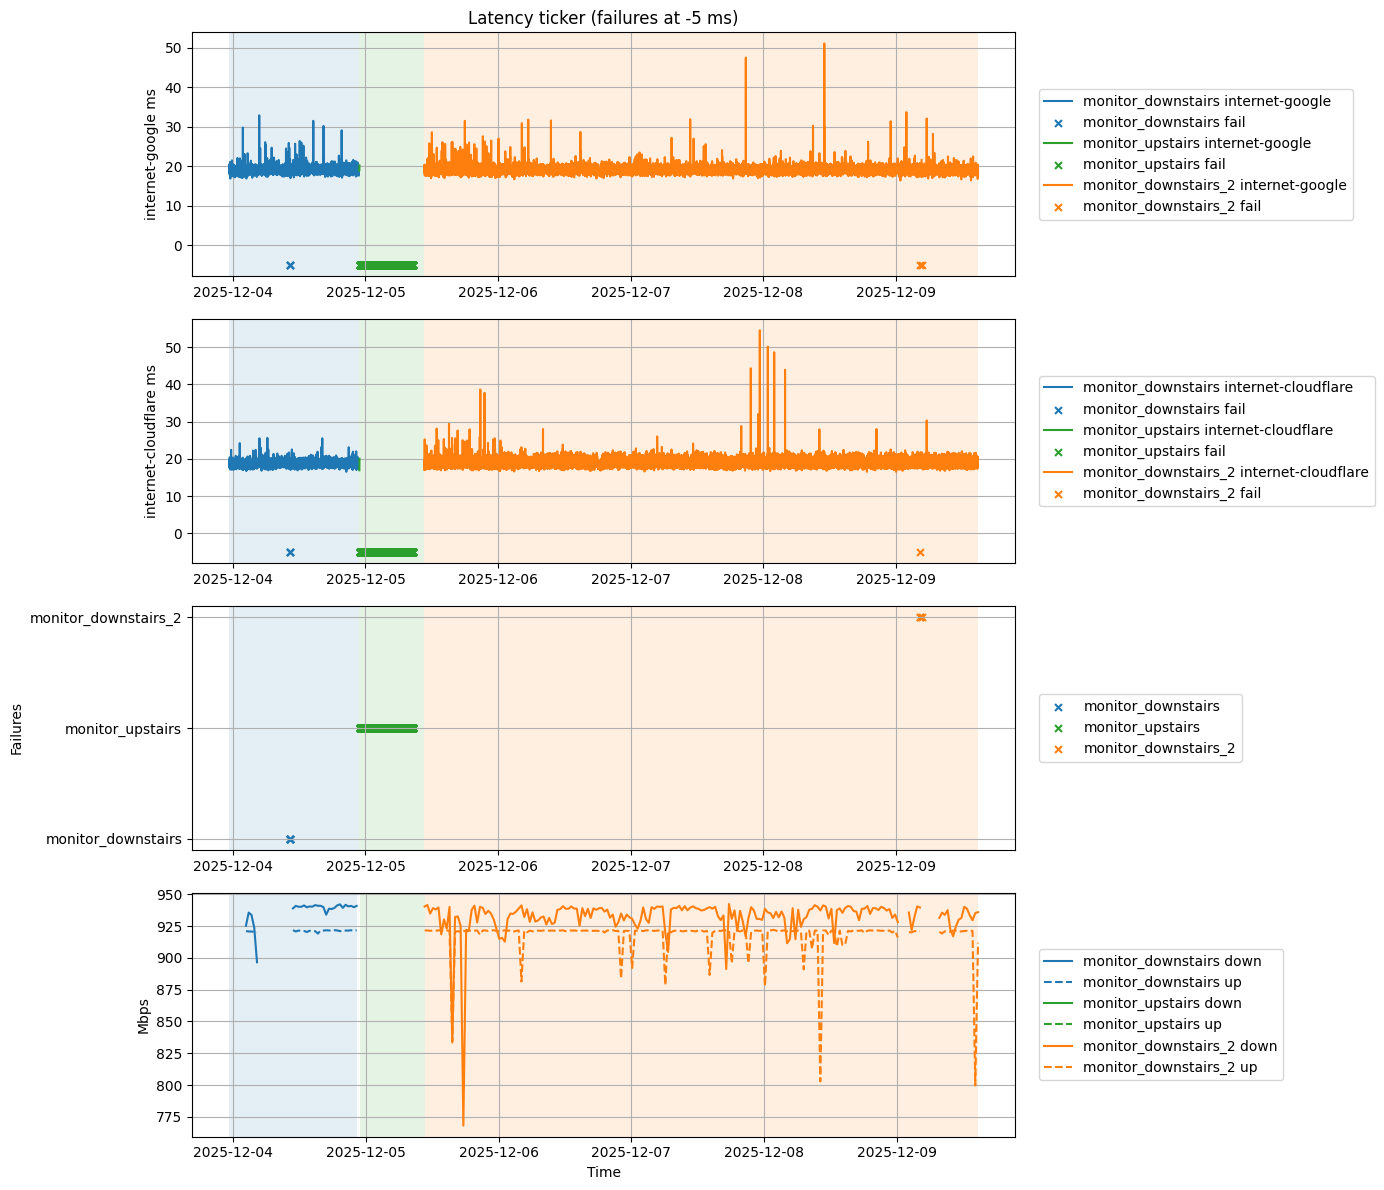

In [3]:
plot = display_data_plot(bundle, target_hints=("google", "cloudflare"))
